In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the consumer complaint dataset
df = pd.read_csv('/kaggle/input/complaints/complaints.csv')
print(df.head())

df.columns = df.columns.str.replace(' ', '_')
column_names = df.columns
print(column_names)

/tmp/ipykernel_15/2460066749.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/complaints/complaints.csv')


  Date received                                            Product  \
0    2023-08-24  Credit reporting, credit repair services, or o...   
1    2023-08-25  Credit reporting or other personal consumer re...   
2    2023-07-13                        Checking or savings account   
3    2023-08-25  Credit reporting or other personal consumer re...   
4    2023-09-13  Credit reporting or other personal consumer re...   

        Sub-product                                              Issue  \
0  Credit reporting  Problem with a credit reporting company's inve...   
1  Credit reporting                        Improper use of your report   
2  Checking account             Problem caused by your funds being low   
3  Credit reporting                        Improper use of your report   
4  Credit reporting  Problem with a company's investigation into an...   

                                           Sub-issue  \
0  Was not notified of investigation status or re...   
1      Reporting compa

1) First, it calculates the count of each unique product category in the 'Product' column of the DataFrame and stores this information in a Pandas Series called product_category_counts. Essentially, it counts how many times each product category appears in the dataset.

Next, it sets up a Matplotlib figure with a specific size of 8 inches in width and 6 inches in height to ensure the resulting plot has the desired dimensions.

Then, it creates a bar chart using the product_category_counts Series. This bar chart visually represents the distribution of product categories, with each category on the x-axis and the count of occurrences on the y-axis.

To enhance the readability of the plot, it sets the title as 'Distribution of Product Categories,' labels the x-axis as 'Product Category,' and labels the y-axis as 'Count.' Additionally, it rotates the x-axis labels by 45 degrees, which can be helpful when dealing with long or numerous category names.

Finally, the plt.show() command displays the generated bar chart on the screen. Overall, this code provides a clear and informative visualization of how different product categories are distributed within the dataset, making it easier to understand the data's composition.

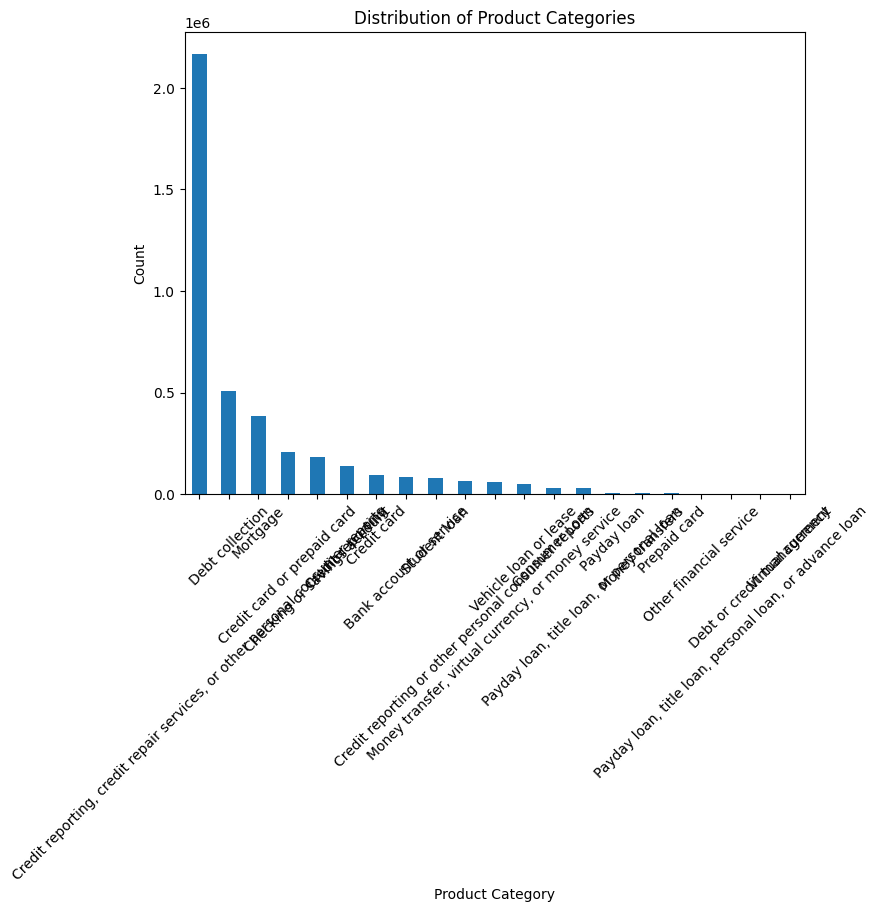

In [2]:
product_category_counts = df['Product'].value_counts()
plt.figure(figsize=(8, 6))
product_category_counts.plot(kind='bar')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

2) In the code, the 'Consumer_complaint_narrative' column within the DataFrame (referred to as 'df') undergoes several text pre-processing steps. Firstly, it is converted to a string data type to ensure uniformity. Then, all the text is converted to lowercase using 'str.lower()', and any non-alphabet characters or whitespace are removed using 'str.replace()'. The processed text is tokenized into individual words, and the resulting word lists are stored in a new column called 'Consumer_complaint_tokens'. Additionally, the code computes the length of each tokenized narrative (i.e., the count of words) and saves this information in another column named 'Text_Length'. To visually explore the distribution of text lengths, a histogram is generated with 30 bins and a transparency level of 0.5 for better visibility. The plot is appropriately labeled with a title, 'Distribution of Text Lengths,' and axis labels ('Text Length' on the x-axis and 'Count' on the y-axis). This code is particularly useful for gaining insights into the typical length of consumer complaint narratives in the dataset and for identifying any potential patterns or outliers.

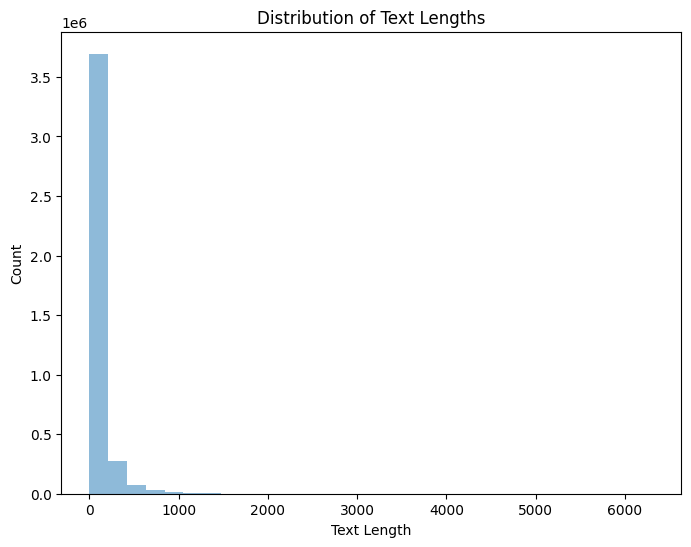

In [3]:
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].astype(str)

# Perform text pre-processing
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].str.lower()
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].str.replace('[^a-zA-Z\s]', '')

# Tokenization (split text into words)
df['Consumer_complaint_tokens'] = df['Consumer_complaint_narrative'].str.split()

# Explore the distribution of text lengths
df['Text_Length'] = df['Consumer_complaint_tokens'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(df['Text_Length'], bins=30, alpha=0.5)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

3)The code installs NLTK with the 'pip install nltk' command. NLTK is a powerful library for natural language processing in Python, commonly used for tasks such as text preprocessing and analysis.

It then imports the 'string' module, which provides various string constants and functions for string manipulation, including character sets for punctuation.

Additionally, the 're' module is imported, which is Python's regular expression library. Regular expressions are used for pattern matching and text manipulation, making them valuable for text preprocessing.

The 'nltk' library itself is imported, allowing access to NLTK's extensive collection of natural language processing tools and resources.

Finally, the code imports the 'stopwords' module from NLTK's 'corpus' package. Stopwords are frequently occurring words like "the" and "and," which are often removed from text data during preprocessing to focus on more meaningful words.

The 'word_tokenize' function is imported from NLTK's 'tokenize' package, which is essential for splitting text into individual words or tokens. This tokenization step is fundamental in many natural language processing tasks, including text analysis and machine learning.

After executing this code, you'll have NLTK and the necessary modules and functions at your disposal for various natural language processing tasks, including text cleaning, tokenization, and more.


In [4]:
!pip install nltk
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.3/774.3 kB 35.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


4) In this code, several text preprocessing steps are applied to the 'Consumer_complaint_narrative' column of the DataFrame ('df'). Firstly, 'this code' ensures that all data in the 'Consumer_complaint_narrative' column is consistently treated as strings by converting any non-string data types to strings using the .astype(str) method. This step ensures that the text data is uniform and can be processed consistently.

Next, 'this code' defines a custom text preprocessing function called preprocess_text. This function takes a text input and performs several cleaning operations. It starts by converting the text to lowercase using text.lower() to standardize capitalization.

Then, 'this code' employs regular expressions (re.sub()) to remove all numeric digits (0-9) from the text, effectively eliminating numbers. Special characters and punctuation are removed using the string.punctuation constant and str.translate() method.

Extra whitespaces are addressed by replacing multiple consecutive whitespace characters with a single space and then removing any leading or trailing spaces using re.sub(r'\s+', ' ', text).strip().

After defining the preprocessing function, 'this code' applies it to each element in the 'Consumer_complaint_narrative' column of the DataFrame using the .apply() method. This means that all complaint narratives undergo the entire text preprocessing pipeline, resulting in cleaner and standardized text data.

Finally, 'this code' tokenizes the preprocessed complaint narratives into individual words and stores these lists of words in a new column called 'Consumer_complaint_tokens.' This tokenization step is crucial for many natural language processing tasks, as it breaks down text into its constituent parts, making it ready for further analysis or modeling. Overall, this code prepares the text data for subsequent NLP tasks by cleaning and tokenizing it.

In [ ]:
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].astype(str)

# Text Pre-processing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply text pre-processing to the 'Consumer_complaint_narrative' column
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].apply(preprocess_text)

# Tokenization (split text into words)
df['Consumer_complaint_tokens'] = df['Consumer_complaint_narrative'].str.split()

5) We explore the distribution of text lengths in the DataFrame ('df') after text preprocessing and tokenization. Firstly, a new column named 'Text_Length' is created by applying the len function to each list of tokens in the 'Consumer_complaint_tokens' column. This effectively calculates the length of each tokenized complaint narrative, representing the number of words in each narrative.

Subsequently, 'this code' utilizes the Matplotlib library to generate a histogram visualization of the text length distribution. It initiates a figure with a specified size of 8 inches in width and 6 inches in height using plt.figure(figsize=(8, 6)).

The plt.hist() function is then used to create the histogram. The 'Text_Length' column is the source of data for the histogram, and it is divided into 30 bins ('bins=30') to represent the distribution more granularly. Additionally, 'alpha=0.5' is used to set the transparency of the histogram bars to 0.5, making it easier to discern overlapping bars.

The plot is appropriately labeled with a title, 'Distribution of Text Lengths,' to provide context. The x-axis is labeled as 'Text Length,' representing the length (in words) of the complaint narratives, while the y-axis is labeled 'Count,' indicating the frequency of narratives falling within each text length range.

Overall, 'this code' generates a histogram that visually illustrates how text lengths are distributed among the complaint narratives in the DataFrame, aiding in the understanding of the typical narrative length and identifying any outliers or patterns in the data.

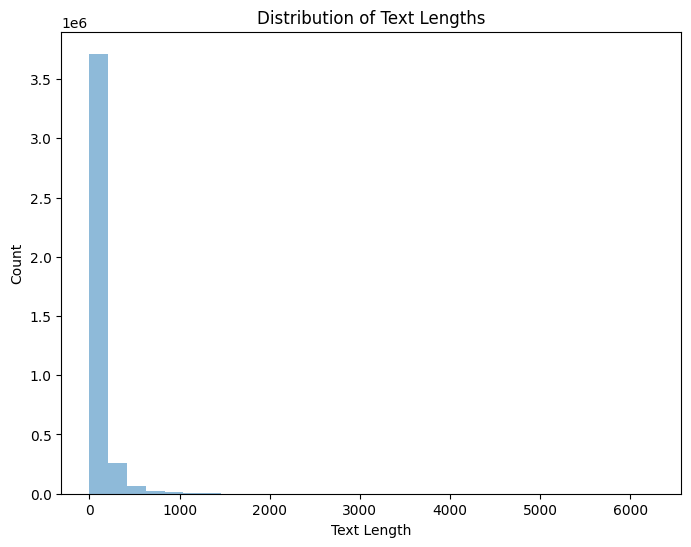

In [5]:
# Explore the distribution of text lengths
df['Text_Length'] = df['Consumer_complaint_tokens'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(df['Text_Length'], bins=30, alpha=0.5)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

6) In this code segment, we perform text classification using various machine learning models.
First, 'this code' imports several necessary modules and functions from the Scikit-learn (sklearn) library for machine learning and natural language processing tasks. These modules include functions for splitting the dataset, text vectorization, and classification.

The dataset is split into training and testing sets. The text data is stored in the 'X' variable, representing the 'Consumer_complaint_narrative' column, and the target labels are stored in the 'y' variable, representing the 'Product' column. The 'train_test_split()' function is used to split the data into training and testing sets. Here, 80% of the data is allocated for training ('X_train' and 'y_train'), and 20% is reserved for testing ('X_test' and 'y_test'). The 'random_state' parameter is set to ensure reproducibility.

Next, 'this code' employs TF-IDF (Term Frequency-Inverse Document Frequency) vectorization for text data. A TF-IDF vectorizer is initialized with a maximum of 5000 features and stopwords are removed using the 'stop_words' parameter set to 'english'. The 'max_features' parameter controls the maximum number of unique words or tokens to consider. TF-IDF vectorization converts the text data into numerical feature vectors, which are suitable for machine learning algorithms.

The training data ('X_train') is transformed into TF-IDF vectors using 'fit_transform()', and the testing data ('X_test') is transformed using 'transform()'. This ensures that both the training and testing data are represented in the same feature space.

After TF-IDF vectorization, 'this code' sets the stage for building and evaluating text classification models. It's worth noting that the models themselves are not defined in this code snippet but typically involve using classifiers like Multinomial Naive Bayes, Logistic Regression, or Support Vector Machines (SVM).

Once models are trained and predictions are made, 'this code' evaluates their performance using metrics such as classification report and accuracy score. These metrics provide insights into how well the models are classifying the consumer complaints into product categories.

Overall, 'this code' prepares the data for text classification by splitting it into training and testing sets, vectorizing the text using TF-IDF, and sets the foundation for building and evaluating text classification models using Scikit-learn.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
X = df['Consumer_complaint_narrative']
y = df['Product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

7) In this code section, we implement the first machine learning model, specifically a Multinomial Naive Bayes classifier, for text classification. Here's the breakdown of the code:

Firstly, a Multinomial Naive Bayes classifier is instantiated and assigned to the variable 'nb_classifier' using the 'MultinomialNB()' constructor from Scikit-learn's 'naive_bayes' module. The Multinomial Naive Bayes algorithm is commonly used for text classification tasks, particularly when dealing with count-based features like TF-IDF.

The 'nb_classifier' is trained on the TF-IDF transformed training data ('X_train_tfidf') and their corresponding labels ('y_train') using the 'fit()' method. During training, the classifier learns patterns and probabilities associated with the features and classes in the training data.

Following the training phase, the 'nb_classifier' is used to make predictions on the TF-IDF transformed testing data ('X_test_tfidf') using the 'predict()' method. These predictions are stored in the 'nb_predictions' variable.

The Multinomial Naive Bayes model has now been trained and applied to the testing data, and 'nb_predictions' contains the predicted product categories for the consumer complaints.

This code represents the initial steps in building and using a text classification model. Further steps would typically include evaluating the model's performance, such as computing accuracy and generating a classification report to assess precision, recall, and F1-score for each class.

In [7]:
# Model 1: Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)

8)a custom evaluation function named 'evaluate_model' is defined to assess the performance of text classification models. Here's the breakdown of this code:

The 'evaluate_model' function takes three parameters:

'y_true': The true labels or ground truth values for the data.
'y_pred': The predicted labels generated by a text classification model.
'model_name': A string specifying the name or identifier of the model being evaluated.
Within the function:

The accuracy of the model is calculated using the 'accuracy_score()' function from Scikit-learn, which measures the proportion of correctly predicted labels.
A classification report is generated using the 'classification_report()' function. This report provides a comprehensive summary of key classification metrics, including precision, recall, F1-score, and support for each class in the dataset.
The model name and evaluation results (accuracy and classification report) are then printed to the console for easy reference.
By defining this 'evaluate_model' function, it becomes convenient to evaluate multiple text classification models using consistent evaluation metrics and report formats. This approach helps in comparing and selecting the best-performing model for the given task. 

In [9]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)

9) Evaluating the Naive Bayes Model.

In [10]:
evaluate_model(y_test, nb_predictions, "Multinomial Naive Bayes")

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Multinomial Naive Bayes
Accuracy: 0.62
Classification Report:
                                                                               precision    recall  f1-score   support

                                                     Bank account or service       0.93      0.00      0.00     17094
                                                 Checking or savings account       0.65      0.32      0.43     36411
                                                               Consumer Loan       1.00      0.00      0.00      6454
                                                                 Credit card       0.60      0.00      0.00     18476
                                                 Credit card or prepaid card       0.52      0.39      0.45     40843
                                                            Credit reporting       0.67      0.00      0.00     28125
                         Credit reporting or other personal consumer reports       0.00      0.00      

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9) Firstly, we import the 'KNeighborsClassifier' from Scikit-learn's 'neighbors' module. This classifier implements the K-nearest neighbors algorithm, a technique often used for classification tasks involving text or numerical data.

Next, we create an instance of the 'KNeighborsClassifier' and assign it to the variable 'knn_classifier.' In this instance, we specify 'n_neighbors' as 13, indicating that the classifier will consider the labels of the 13 nearest neighbors when making predictions. This parameter, 'n_neighbors,' is a hyperparameter that can be adjusted to optimize model performance.

Following that, we train the 'knn_classifier' on the TF-IDF transformed training data ('X_train_tfidf') and their corresponding labels ('y_train') using the 'fit()' method. During the training process, the KNN classifier learns the relationships between the feature vectors (TF-IDF representations of the text) in the training data and their associated class labels.

After completing the training phase, the 'knn_classifier' is applied to the TF-IDF transformed testing data ('X_test_tfidf') using the 'predict()' method. The predictions for the product categories of the consumer complaints are then stored in the 'knn_predictions' variable.

To assess the performance of the K-Nearest Neighbors classifier and compare it to other models, you can use the 'evaluate_model' function defined earlier. This function computes accuracy and provides a comprehensive classification report, allowing you to evaluate precision, recall, F1-score, and support for each class in the dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=13)
knn_classifier.fit(X_train_tfidf, y_train)
knn_predictions = knn_classifier.predict(X_test_tfidf)


10) Evaluating the KNN model.

In [ ]:
evaluate_model(y_test, knn_predictions, "K Nearest Neighbor")

11) The code is designed to evaluate the performance of two machine learning models: Multinomial Naive Bayes and K-Nearest Neighbors (KNN). It begins by importing essential functions from the `sklearn.metrics` module, such as `classification_report`, `confusion_matrix`, and `accuracy_score`. 

To facilitate the evaluation process, the code defines the `evaluate_model` function, which takes three arguments: `y_true` (the actual labels), `y_pred` (the predicted labels), and `model_name` (a string specifying the model's name). Inside this function, it calculates the accuracy, generates a classification report containing precision, recall, F1-score, and support for each class, and computes the confusion matrix.

The code then proceeds to evaluate the Multinomial Naive Bayes model. It predicts labels for the test data using a Multinomial Naive Bayes classifier (`nb_classifier`) and stores these predictions in the `nb_predictions` variable. Subsequently, it employs the `evaluate_model` function to assess the model's performance based on the true labels (`y_test`), predicted labels (`nb_predictions`), and assigns the model name as "Multinomial Naive Bayes."

Similarly, the code evaluates the K-Nearest Neighbors (KNN) model by predicting labels for the test data using a K-Nearest Neighbors classifier (`knn_classifier`). The predictions are stored in the `knn_predictions` variable. The `evaluate_model` function is then called again to evaluate the K-Nearest Neighbors (KNN) model's performance using the same metrics and reporting structure, with the model name set as "K-Nearest Neighbors (KNN)."

In summary, the code efficiently evaluates and reports the performance of both the Multinomial Naive Bayes and K-Nearest Neighbors (KNN) models using common classification metrics, making it easier to assess and compare their effectiveness on a given dataset.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)

# Evaluate Multinomial Naive Bayes
nb_predictions = nb_classifier.predict(X_test_tfidf)
evaluate_model(y_test, nb_predictions, "Multinomial Naive Bayes")

# Evaluate K-Nearest Neighbors (KNN)
knn_predictions = knn_classifier.predict(X_test_tfidf)
evaluate_model(y_test, knn_predictions, "K-Nearest Neighbors (KNN)")

12) This code snippet demonstrates a step-by-step process for making predictions on a given text using a pre-trained machine learning model. It begins with an empty `text_to_predict` variable intended to hold the text for prediction. The assumption is that this text has been preprocessed in the same way as during the model training phase, which could include tasks like removing stopwords or tokenization.

Next, the preprocessed text is transformed into a numerical format using a Term Frequency-Inverse Document Frequency (TF-IDF) vectorizer, which was previously fitted on the training data. This ensures consistency in text representation between training and prediction.

The code then employs the trained machine learning model to predict the category or class that the input text belongs to. The result is stored in `predicted_category`. To make the prediction interpretable, the numerical category label is decoded into a human-readable label using a label encoder. Finally, the code prints the predicted category label, allowing users to understand the model's classification outcome in a user-friendly manner. This workflow is useful for a variety of text classification applications, from sentiment analysis to content categorization.

In [ ]:
text_to_predict = ""
text_to_predict = preprocess_text(text_to_predict)
text_to_predict_tfidf = tfidf_vectorizer.transform([text_to_predict])
predicted_category = model.predict(text_to_predict_tfidf)
predicted_category_label = label_encoder.inverse_transform(predicted_category)
print(f"Predicted Category: {predicted_category_label[0]}")

Note :  The code ran properly the first time I had run it. The Colab and Kaggle sessions started to crash from my second runs. So some parts are missing.